In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats         
from scipy.stats import linregress
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

class Train:
    def __init__(self,data):
        self.df = pd.read_csv(data)
        print(self.df, "\n")
        
    def cleandata(self):
        self.df.dropna(inplace = True)
    
    def counting(self):
        count = len(self.df)
        return count
    
    def passengers(self):
        self.df['station'].unique()
        S = len(self.df[self.df.station == 'S'])
        C = len(self.df[self.df.station == 'C'])
        Q = len(self.df[self.df.station == 'Q'])
        if S > Q and S > C:
            print("The number of passengers is highest from station S \n")
        elif Q > C and Q > S:
            print("The number of passengers is highest from station Q \n")
        else:
            print("The number of passengers is highest from station C \n")
    
    def data_exploration(self):
        print(self.df.head(), "\n")
        print(self.df.info(), "\n")
        print(self.df.describe(), "\n")
        print(self.df.nunique(), "\n")
    
    def outliers(self):
        df1 = self.df[['age']]
        df1['agereturns'] = df1['age'].pct_change()
        print(df1,"\n")
        df1 = df1[1:]
        print(df1, "\n")
        df1['agereturns'].plot(kind = 'hist', bins = 75)
        print(f"Skewness : {round(df1.agereturns.skew(),2)} \n")
        print(f"Kurtosis : {round(df1.agereturns.kurt(),2)} \n")
        df1_sd = df1.agereturns.std()
        print(f"standard deviation : {round(df1_sd,3)} \n")
        print(df1[df1.agereturns > (df1_sd * 3)], "\n")
        print(df1[df1.agereturns < (-df1_sd * 3)], "\n")
    
    def datapartition(self):
        self.df['sex_binary'] = self.df.sex.map({'male' : 0, 'female' : 1})
        print(self.df.head(),"\n")
        self.df['station_S_binary'] = self.df.station.map({'S' : 1, 'C' : 0, 'Q' : 0})
        self.df['station_C_binary'] = self.df.station.map({'S' : 0, 'C' : 1, 'Q' : 0})
        print(self.df,"\n")
        X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(self.df[
    ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_binary', 
    'station_S_binary', 'station_C_binary']], self.df['survived'], train_size = 0.70, test_size = 0.30, random_state = 12345)
        return X_train, X_test, Y_train, Y_test
    
    def knn(self, X_train, X_test, Y_train, Y_test):
        training_accuracy = []
        test_accuracy = []

        neighbors_settings = range(1,30)
        for n_neigh in neighbors_settings:
            modelfit = sk.neighbors.KNeighborsClassifier(n_neighbors=n_neigh)
            modelfit.fit(X_train, Y_train)
            training_accuracy.append(modelfit.score(X_train, Y_train))
            test_accuracy.append(modelfit.score(X_test, Y_test))
            
        plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "Test Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("No of KNN")
        plt.legend()
        
        modelfit = KNeighborsClassifier(n_neighbors=8)
        modelfit.fit(X_train, Y_train)
        print("Train set accuracy: ", modelfit.score(X_train, Y_train), "\n")
        print("Test set accuracy: ", modelfit.score(X_test, Y_test), "\n")
        
    def logisticreg(self, X_train, X_test, Y_train, Y_test):
        logreg = LogisticRegression()
        logreg.fit(X_train, Y_train)
        
        print("Train set accuracy: ", logreg.score(X_train, Y_train), "\n")
        print("Test set accuracy: ", logreg.score(X_test, Y_test), "\n")
        
    def decisiontree(self, X_train, X_test, Y_train, Y_test):
        treeMod = DecisionTreeClassifier(max_depth=3, random_state=8)
        treeMod.fit(X_train, Y_train)
        
        print("Train set accuracy: ", treeMod.score(X_train, Y_train), "\n")
        print("Test set accuracy: ", treeMod.score(X_test, Y_test), "\n")
        
        tree_training_accuracy = []
        tree_test_accuracy = []

        tree_depth = range(1,15)

        for td in tree_depth:
            treeMod = DecisionTreeClassifier(max_depth=td, random_state=8)
            treeMod.fit(X_train, Y_train)
            tree_training_accuracy.append(treeMod.score(X_train, Y_train))
            tree_test_accuracy.append(treeMod.score(X_test, Y_test))
        
        plt.plot(tree_depth, tree_training_accuracy, label = "TTraining Accuracy")
        plt.plot(tree_depth, tree_test_accuracy, label = "TTest Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Depth of Tree")
        plt.legend()

        plt.figure(figsize=(15,15))
        tree.plot_tree(treeMod, feature_names=['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_binary', 
    'station_S_binary', 'station_C_binary'], class_names=None, filled=True,
              fontsize = 5)
        plt.show()
    
    def data_plot(self):
        sns.countplot(data = self.df, x = 'station')
    
    def data_plot1(self):
        sns.barplot(data = self.df, x = self.df.sex, y = 'age')
        
    def data_plot2(self):
        sns.barplot(data = self.df, x = self.df.station, y = 'survived')

In [2]:
traindata = Train('TrainData.csv')

     survived  pclass     sex   age  sibsp  parch     fare station
0           0       3    male  22.0      1      0   7.2500       S
1           1       1  female  38.0      1      0  71.2833       C
2           1       3  female  26.0      0      0   7.9250       S
3           1       1  female  35.0      1      0  53.1000       S
4           0       3    male  35.0      0      0   8.0500       S
..        ...     ...     ...   ...    ...    ...      ...     ...
886         0       2    male  27.0      0      0  13.0000       S
887         1       1  female  19.0      0      0  30.0000       S
888         0       3  female   NaN      1      2  23.4500       S
889         1       1    male  26.0      0      0  30.0000       C
890         0       3    male  32.0      0      0   7.7500       Q

[891 rows x 8 columns] 



In [3]:
traindata.cleandata()
print(f"After clearing data the record count is {traindata.counting()}\n")

After clearing data the record count is 712



In [4]:
traindata.passengers()

The number of passengers is highest from station S 



In [5]:
traindata.data_exploration()

   survived  pclass     sex   age  sibsp  parch     fare station
0         0       3    male  22.0      1      0   7.2500       S
1         1       1  female  38.0      1      0  71.2833       C
2         1       3  female  26.0      0      0   7.9250       S
3         1       1  female  35.0      1      0  53.1000       S
4         0       3    male  35.0      0      0   8.0500       S 

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   station   712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB
None 

         survived      pclass         age       s

      age  agereturns
0    22.0         NaN
1    38.0    0.727273
2    26.0   -0.315789
3    35.0    0.346154
4    35.0    0.000000
..    ...         ...
885  39.0    0.560000
886  27.0   -0.307692
887  19.0   -0.296296
889  26.0    0.368421
890  32.0    0.230769

[712 rows x 2 columns] 

      age  agereturns
1    38.0    0.727273
2    26.0   -0.315789
3    35.0    0.346154
4    35.0    0.000000
6    54.0    0.542857
..    ...         ...
885  39.0    0.560000
886  27.0   -0.307692
887  19.0   -0.296296
889  26.0    0.368421
890  32.0    0.230769

[711 rows x 2 columns] 

Skewness : 7.51 

Kurtosis : 65.86 

standard deviation : 5.552 

      age  agereturns
79   30.0   35.144578
173  21.0   20.000000
299  50.0   24.000000
307  17.0   17.478261
382  32.0   31.000000
387  36.0   35.000000
471  38.0   49.666667
645  48.0   63.000000
756  28.0   40.791045
789  46.0   45.000000
804  27.0   63.285714
833  23.0   26.710843
851  74.0   17.500000 

Empty DataFrame
Columns: [age, agereturns]
I

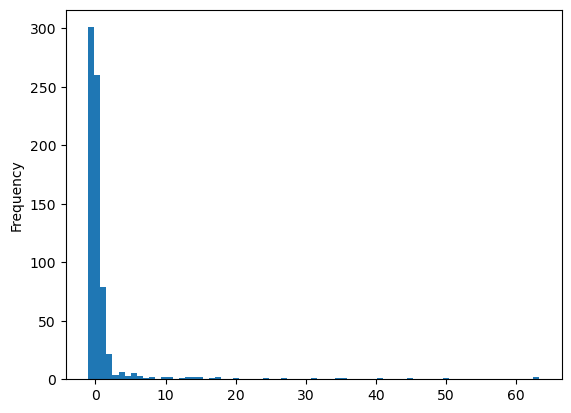

In [6]:
traindata.outliers()

In [7]:
X_train, X_test, Y_train, Y_test = traindata.datapartition()

   survived  pclass     sex   age  sibsp  parch     fare station  sex_binary
0         0       3    male  22.0      1      0   7.2500       S           0
1         1       1  female  38.0      1      0  71.2833       C           1
2         1       3  female  26.0      0      0   7.9250       S           1
3         1       1  female  35.0      1      0  53.1000       S           1
4         0       3    male  35.0      0      0   8.0500       S           0 

     survived  pclass     sex   age  sibsp  parch     fare station  \
0           0       3    male  22.0      1      0   7.2500       S   
1           1       1  female  38.0      1      0  71.2833       C   
2           1       3  female  26.0      0      0   7.9250       S   
3           1       1  female  35.0      1      0  53.1000       S   
4           0       3    male  35.0      0      0   8.0500       S   
..        ...     ...     ...   ...    ...    ...      ...     ...   
885         0       3  female  39.0      0    

Train set accuracy:  0.7369477911646586 

Test set accuracy:  0.7102803738317757 



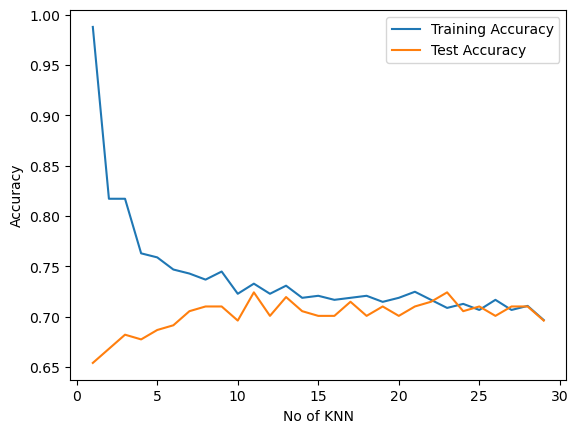

In [8]:
traindata.knn(X_train, X_test, Y_train, Y_test)

#Based on the above graph the best k-value is 8.

In [44]:
traindata.logisticreg(X_train, X_test, Y_train, Y_test)

Train set accuracy:  0.7811244979919679 

Test set accuracy:  0.8130841121495327 



#Comparing the train set accuracy of knn and logistic regression, the logistic regression model has the highest value and therefore logistic regression is the better model

Train set accuracy:  0.8293172690763052 

Test set accuracy:  0.8177570093457944 



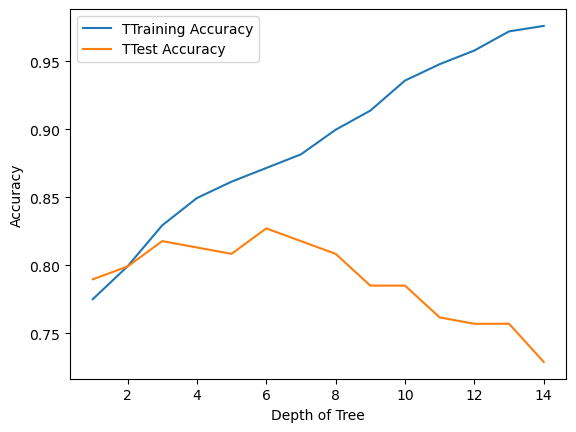

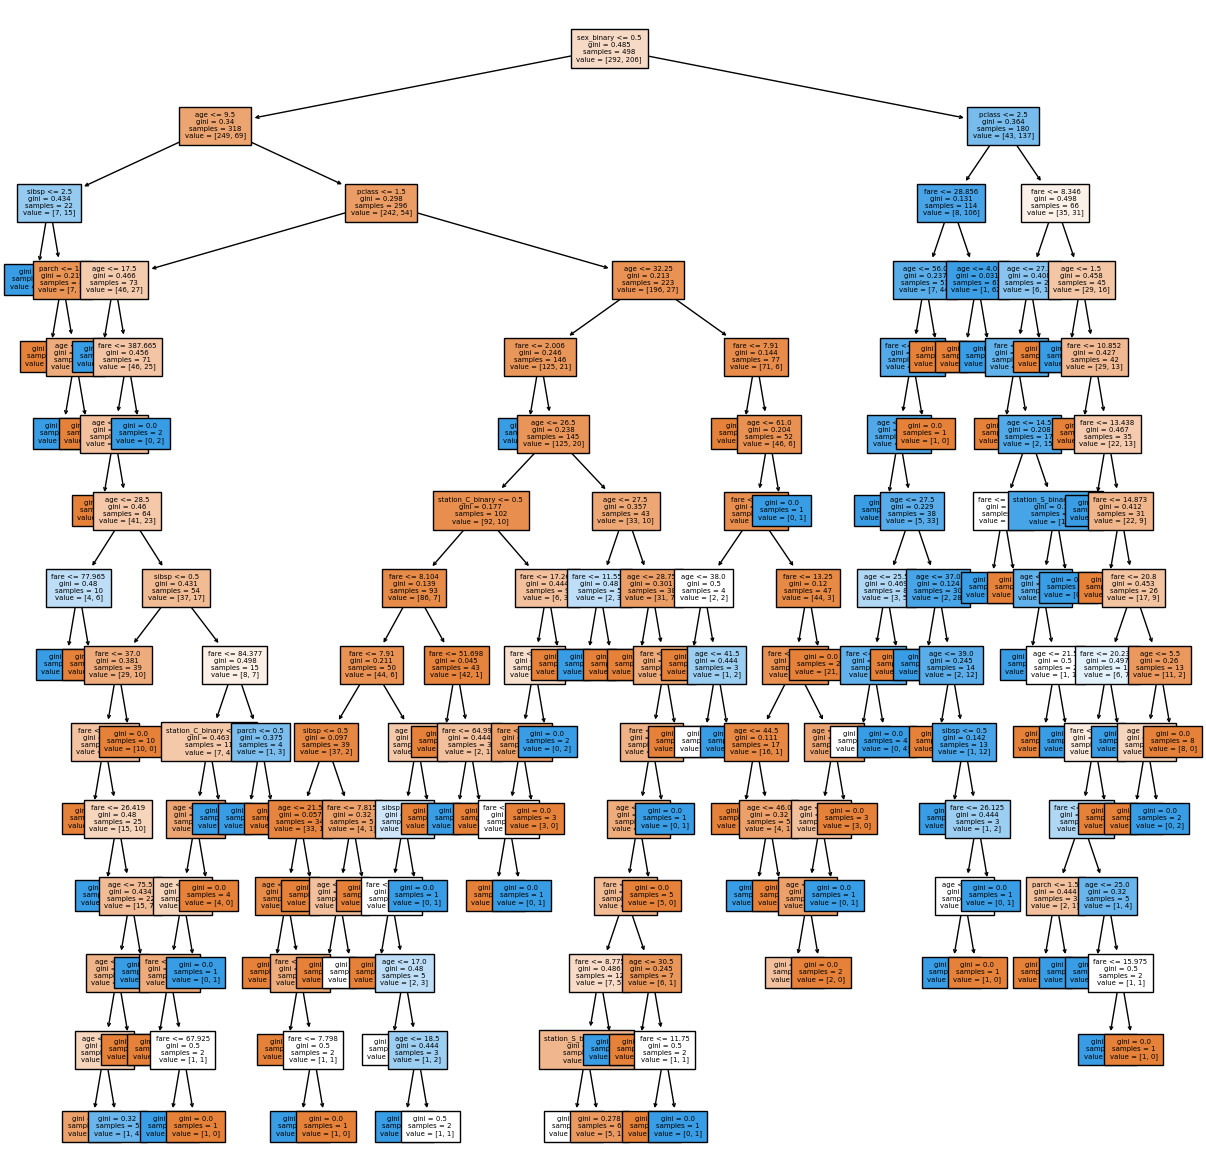

In [45]:
traindata.decisiontree(X_train, X_test, Y_train, Y_test)

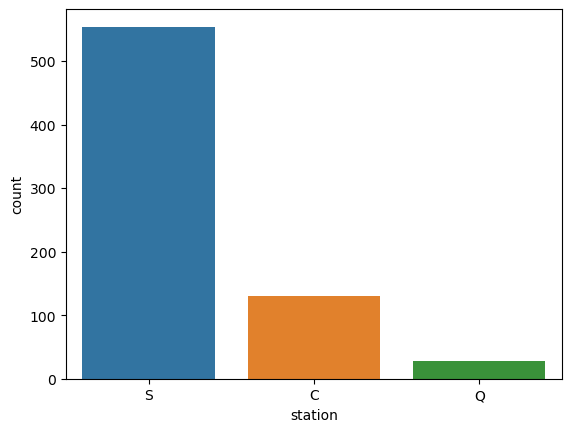

In [46]:
traindata.data_plot()

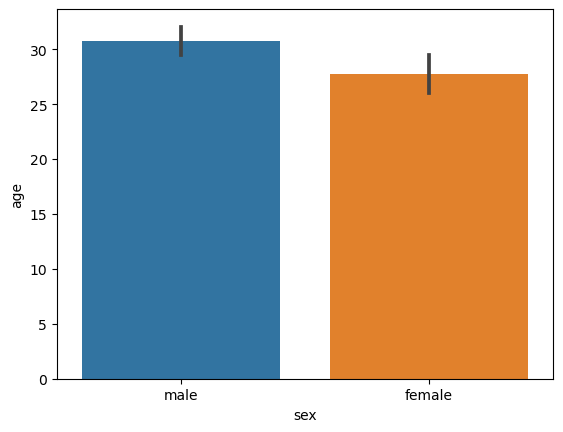

In [47]:
traindata.data_plot1()

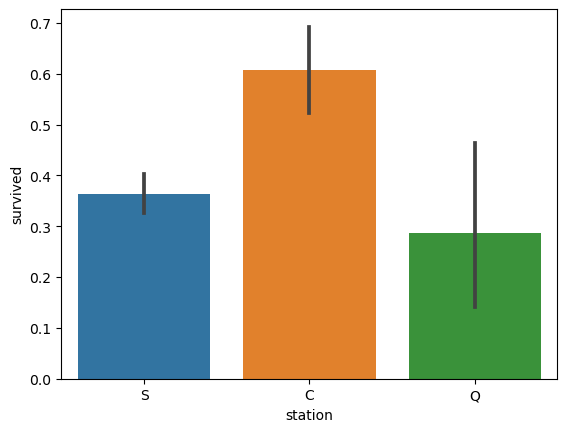

In [48]:
traindata.data_plot2()